In [7]:
#Notes

#Decide on a hypothesis
#Answer questions
#Cleanup Data
#DO NOT USE SCATTER MATRIX

In [8]:
# Various libraries needed to be imported for this project.

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
import cufflinks as cf
from scipy import stats
sns.set_style("whitegrid")

## Dataset source: https://www.kaggle.com/timmate/avocado-prices-2020. ##

#### This is an updated version of the avocado dataset originally compiled from the Hass Avocado Board (or HAB, for short) data and published on Kaggle by Justin Kiggins in 2018. The dataset features historical data on avocado prices and sales volume in multiple cities, states, and regions of the USA. We are using data only from 2015 through 2019 because the data for the entire year for 2020 is not available yet. The data was quite clean to begin with so not much had to be deleted or edited.

These are the variables within the dataset:

1) Date – Weekly observation dates from 2015-2019

2) Average Price – Average price of a single avocado

3) Total Volume – Total # of Avocados by PLU sold during that week (the reading is taken every Sunday)

4) Sales by PLUs (Price Look-Up) - 4046/4225/4770

5) Total Bags – Total bags sold

6) Sales by Bag Sizes - Small/Large/XLarge Bags

7) Type – Organic or Conventional

8) Year – Year of observation

9) Region – City or Region of the observation

In [9]:
# Data was imported as a .csv file from Kaggle.com (https://www.kaggle.com/timmate/avocado-prices-2020). 
# This is a pretty large size dataset.

avo=pd.read_csv('avocado-updated-2020.csv')
avo

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico


In [10]:
# The use of .head() shows us the first 5 rows of data at the top of the dataframe.
avo.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [11]:
# The use of .tail() shows us the last 5 rows of data at the bottom of the dataframe.
avo.tail()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico
30020,2020-05-17,1.58,36881.00,1147.00,1243.00,2645.00,31846.00,25621.00,6225.00,0.00,organic,2020,West Tex/New Mexico


In [12]:
# This shows us the size of the dataset, i.e. the number of elements in it.
avo.size

390273

In [13]:
# .shape() shows us how many columns and rows of data there are in the dataframe.
avo.shape

(30021, 13)

In [14]:
#We added Month in the columns to add an extra variable for us to manipulate the data
avo['Month']=pd.DatetimeIndex(avo['date']).month

In [15]:
# The following formatting was applied in order to make the dataframe look easier to read (sizes were renamed
# to better understand them). The PLU (price look-up) number by itself don't tell us what size the avocados are.
# We have put the size next to the number to make them easier to identify.

avo1=avo.rename(columns={'date':'Date',
'4046':'4046S',
'4225':'4225L',
'4770':'4770XL', 
'average_price':'AvgPr', 
'total_volume':'TVol', 
'total_bags':'TBags', 
'small_bags':'SBags', 
'large_bags':'LBags',  
'xlarge_bags':'XLBags',
'type':'Type', 
'year':'Year',
'geography':'Location', 
'month':'Month',
'day':'Day'})
avo1

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Type,Year,Location,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.,5
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West,5
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West,5
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico,5


In [16]:
# convert data type of the column "Date"
avo1["Date"] = pd.to_datetime(avo1["Date"])
# sample to data points to check the content and the data type
avo1["Date"].sample(2)

10808   2016-12-04
21215   2018-09-30
Name: Date, dtype: datetime64[ns]

The code below is what Jorge shared the other day that helped get rid of Organic(avo2) and Conventional(avo3). The code after this is causing issues with Location as it gets rid of everything but Total US and making it impossible to properly get rid of the Cities and so forth because they no longer exist. I didnt get rid of it because I wasnt sure if you still needed it. -Jovany 11/21/20

In [17]:
#Unfortunately Organic and XL Bags had a lot of 0 values that messed with our data
avo_D= avo1.drop(['XLBags'], axis=1)
#Next we will drop the Organic part of our data after some trial and error we picked Date and Location for this
#If we just used Date it would only give us data from Albany. If we just used Location it only gave data from the first month
avo2= avo_D[avo1.Type!='organic']
avo3= avo_D[avo1.Type!='conventional']

avo2.head(2)

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,conventional,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,1


In [18]:
#I dont know if youre gonna need this code so I didnt delete it just yet -Jovany 11/21/20

# Removed the periods in Total U.S. to be able to code without errors.

#avo2 = pd.DataFrame(['Total U.S.'], columns=['Location'])
#avo1['Location'] = avo2['Location'].str.replace('.','')
#print(avo1)

#avo2.replace("Total US", "Total_US")

In [19]:
# .info() is used to find out the category, non-null count and data type (.dtypes) so we can find out if any changes need to be
# made, e.g. whether a category needs to be changed to a number. In this dataset, everything is assigned the correct data type.
avo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      30021 non-null  datetime64[ns]
 1   AvgPr     30021 non-null  float64       
 2   TVol      30021 non-null  float64       
 3   4046S     30021 non-null  float64       
 4   4225L     30021 non-null  float64       
 5   4770XL    30021 non-null  float64       
 6   TBags     30021 non-null  float64       
 7   SBags     30021 non-null  float64       
 8   LBags     30021 non-null  float64       
 9   XLBags    30021 non-null  float64       
 10  Type      30021 non-null  object        
 11  Year      30021 non-null  int64         
 12  Location  30021 non-null  object        
 13  Month     30021 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 3.2+ MB


In [20]:
# use describe() to get statistical analysis of the data
avo1.describe()

,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Year,Month
count,30021.000000,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,30021.000000,30021.000000
mean,1.390930,9.392546e+05,2.991073e+05,2.849014e+05,2.162937e+04,3.335336e+05,2.321256e+05,9.518529e+04,6.222717e+03,2017.205123,6.176077
std,0.381347,3.813519e+06,1.289108e+06,1.169078e+06,1.009188e+05,1.415618e+06,9.505028e+05,4.672104e+05,3.813737e+04,1.570133,3.439344
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,1.000000
25%,1.110000,1.429853e+04,7.827800e+02,2.814000e+03,0.000000e+00,8.373820e+03,5.955980e+03,3.515900e+02,0.000000e+00,2016.000000,3.000000
50%,1.350000,1.242047e+05,1.052276e+04,2.456722e+04,1.867500e+02,5.039131e+04,3.425532e+04,5.171120e+03,0.000000e+00,2017.000000,6.000000
75%,1.630000,4.898029e+05,1.151556e+05,1.409472e+05,5.424160e+03,1.591742e+05,1.129384e+05,3.606762e+04,5.600000e+02,2019.000000,9.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.022564e+06,2020.000000,12.000000


In [21]:
# DISPLAYS THE UNIQUE YEARS IN THE DATASET
avo1.Year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

### Need to drop the data for year 2020 the reason being is that 2020 is incomplete atm. The furthest the data goes is up until May 17, 2020 which we can't fully compare with 2015-2019.

In [22]:
#I found a site that helped me figure this out. It looks like we can delete data just using the index or we could specify certain columns/rows and just get rid chunks of data.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.truncate.html -Jovany 11/22/2020
#avo20 is just a working title i was using it can be changed. If you guys want a different name let me know and Ill change all the instances avo 20 was used -Jovany 11/22/2020
#avo21 has organic values -Jovany 11/22/2020

avo21= avo1.truncate(after=27859)
avo20= avo2.truncate(after=27859)
avo20.tail(3)

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
27855,2019-12-29,0.92,39387849.97,11755125.67,7518140.74,695276.47,19419307.09,10764993.72,7997196.35,conventional,2019,Total U.S.,12
27857,2019-12-29,0.92,6927559.92,1609179.97,985081.34,49846.87,4283451.74,1900050.95,2288497.60,conventional,2019,West,12
27859,2019-12-29,0.84,797419.57,313633.10,66511.40,79427.29,337847.78,217223.04,119482.38,conventional,2019,West Tex/New Mexico,12


In [23]:
# Displays all the Regions/States/Cities in the dataset.
avo1.Location.unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

# West Tex/New Mexico has a value of 553, which we need to fill up so it too shows 556.

In [340]:
# Can also use avo.Location.value_counts() to give us the count for each Location
avo1["Location"].value_counts()

Detroit                 556
Boston                  556
Roanoke                 556
Seattle                 556
Miami/Ft. Lauderdale    556
New Orleans/Mobile      556
Charlotte               556
Northeast               556
Sacramento              556
Dallas/Ft. Worth        556
Philadelphia            556
Great Lakes             556
Grand Rapids            556
St. Louis               556
New York                556
Los Angeles             556
Spokane                 556
Cincinnati/Dayton       556
Hartford/Springfield    556
Syracuse                556
Richmond/Norfolk        556
South Central           556
Las Vegas               556
Pittsburgh              556
Tampa                   556
California              556
Jacksonville            556
Northern New England    556
West                    556
Baltimore/Washington    556
Nashville               556
Louisville              556
South Carolina          556
San Francisco           556
San Diego               556
Buffalo/Rochester   

In [341]:
#THIS FUNCTION GIVES US THE MEAN() OF WHAT EVER PARAMETER WE PUT INTO []
avo1['AvgPr'].mean()

1.3909296825555442

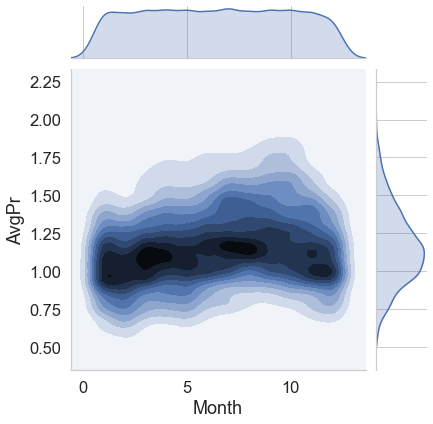

In [342]:
#Let's plot out the mean of the previous syntax

sns.jointplot(x='Month',y='AvgPr', data=avo20, kind='kde')

### NOTE: All the data recorded here are on Sundays 

In [343]:
# We numbered the months so that we can show the correlation of the time of year with the price of the avocados.
avo1['Month']=pd.DatetimeIndex(avo1['Date']).month
avo1

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Type,Year,Location,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.,5
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West,5
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West,5
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico,5


Text(0.5, 1.0, 'Average Price')

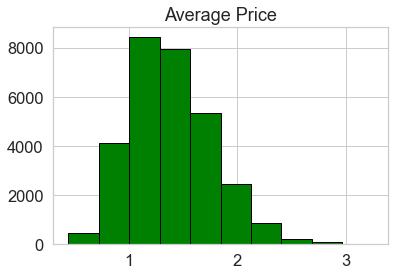

In [344]:
plt.hist(avo1['AvgPr'],facecolor='green',edgecolor='black',bins=10)
plt.title("Average Price")

In [345]:
# Average Price by Year
pd.pivot_table(avo21,index='Year', values='AvgPr')

,AvgPr
Year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.355019
2019,1.401496


In [346]:
# This pivot table shows us the Average Price of the avocados each Year by Type.
pd.pivot_table(avo21,index='Year', values='AvgPr', columns='Type', aggfunc='mean')

Type,conventional,organic
Year,,
2015,1.077963,1.673324
2016,1.105595,1.571684
2017,1.294888,1.735521
2018,1.141092,1.568946
2019,1.187179,1.615889


In [347]:
# Pivot Table for Average Price by Year and Location (Will remove Organic later)
pd.pivot_table(avo20,index=['Year','Location'], values='AvgPr', columns='Type', aggfunc='mean', margins=True)

Type                       conventional       All
Year Location                                    
2015 Albany                    1.171923  1.171923
     Atlanta                   1.052308  1.052308
     Baltimore/Washington      1.168077  1.168077
     Boise                     1.054038  1.054038
     Boston                    1.144038  1.144038
...                                 ...       ...
2019 Tampa                     1.070385  1.070385
     Total U.S.                1.143654  1.143654
     West                      1.141154  1.141154
     West Tex/New Mexico       0.985385  0.985385
All                            1.162097  1.162097

[271 rows x 2 columns]

### The bar graph below shows that the number of Organic avocados sold were the same as the Conventional type. However, this is NOT TRUE because just over 2% of our dataset is Organic.

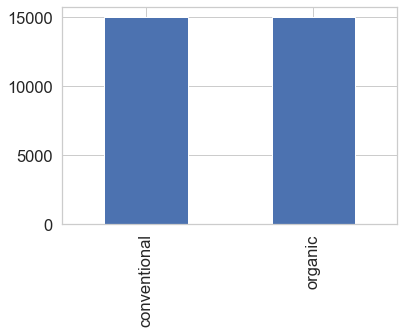

In [348]:
# This plot shows us how many avocados by Type were sold overall.
pd.value_counts(avo1['Type']).plot.bar()

In [349]:
# Median Price by Year and Type.
pd.pivot_table(avo21, index='Year',  values='AvgPr',  columns='Type', aggfunc='median',  margins=True)

Type,conventional,organic,All
Year,,,
2015,1.08,1.67,1.30
2016,1.08,1.53,1.30
2017,1.30,1.72,1.49
2018,1.14,1.55,1.34
2019,1.17,1.58,1.36
All,1.14,1.60,1.36


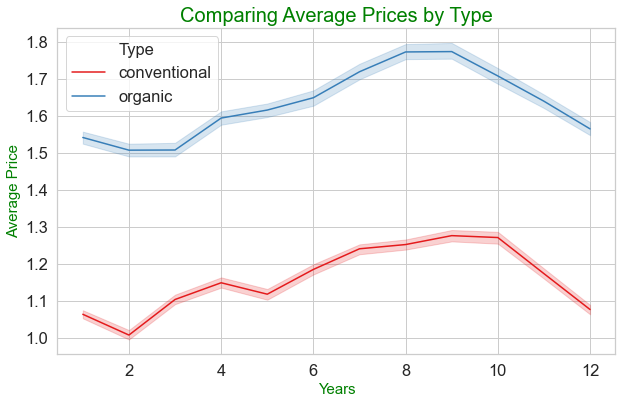

In [350]:
# We can see here that Organic avocados generally have had a higher Average Price than Conventional avocados.
# This lineplot shows that the Average Price of Organic avocados is much higher than Conventional avocados.

plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="AvgPr", hue='Type', data=avo21, palette = "Set1")
plt.title("Comparing Average Prices by Type",fontsize = 20,color='green')
plt.xlabel('Years',fontsize = 15,color='green')
plt.ylabel('Average Price',fontsize = 15,color='green')
plt.show()

Text(0, 0.5, 'Average Price')

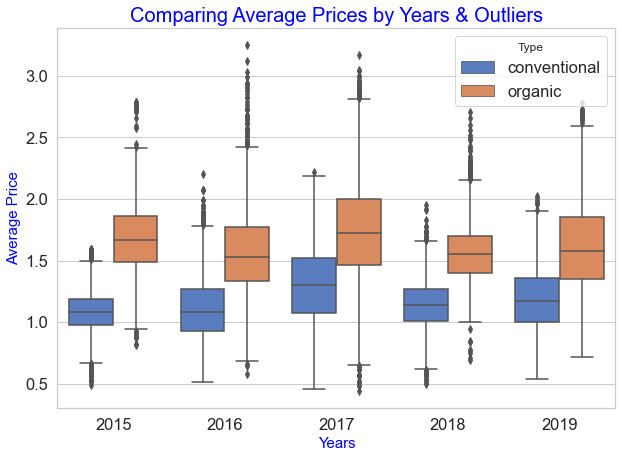

In [351]:
# Boxplot to compare Average Prices by Year and Type.
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="Year", y="AvgPr",hue="Type",data=avo21,palette="muted");
plt.title("Comparing Average Prices by Years & Outliers",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')


## Organic still shows up below. Need to fix it.


I fixed this issue up on top

-Jovany 11/21/20

In [352]:
# This pivot table shows us the Highest and Lowest Average Price by Year and Location of all avocados 
# (including conventional and organic).

avo2_pivot = pd.pivot_table(avo2, index = 'AvgPr', columns = 'Year', values = 'Location', aggfunc = 'sum')
avo2_pivot

Year,2015,2016,2017,2018,2019,2020
AvgPr,,,,,,
0.46,NaN,NaN,Phoenix/Tucson,NaN,NaN,NaN
0.49,Phoenix/Tucson,NaN,NaN,NaN,NaN,NaN
0.50,NaN,NaN,NaN,Houston,NaN,NaN
0.51,Phoenix/Tucson,Phoenix/Tucson,Houston,Houston,NaN,NaN
0.52,Phoenix/Tucson,NaN,West Tex/New Mexico,NaN,NaN,NaN
...,...,...,...,...,...,...
2.14,NaN,NaN,Chicago,NaN,NaN,NaN
2.15,NaN,NaN,Chicago,NaN,NaN,NaN
2.19,NaN,NaN,Grand Rapids,NaN,NaN,NaN


In [353]:
#????????????????
avo2.groupby(['Location','Year'],as_index=False)['TVol'].agg('mean')

,Location,Year,TVol
0,Albany,2015,7.620873e+04
1,Albany,2016,9.945315e+04
2,Albany,2017,9.577854e+04
3,Albany,2018,1.244709e+05
4,Albany,2019,1.224831e+05
...,...,...,...
319,West Tex/New Mexico,2016,8.242858e+05
320,West Tex/New Mexico,2017,8.768011e+05
321,West Tex/New Mexico,2018,8.985247e+05
322,West Tex/New Mexico,2019,8.858543e+05


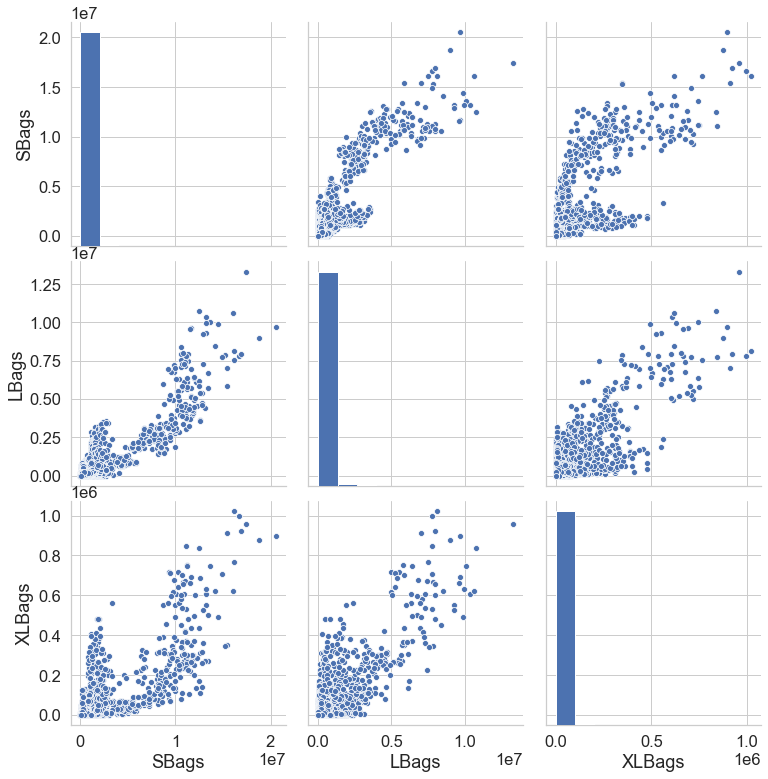

In [354]:
# A comparison between the sales of Small Bags, Large Bags, and Extra Large Bags.
sns.pairplot(avo1.iloc[:,7:11], height=3.5)

## Need to reset below code after Organic and XLBags have been removed.

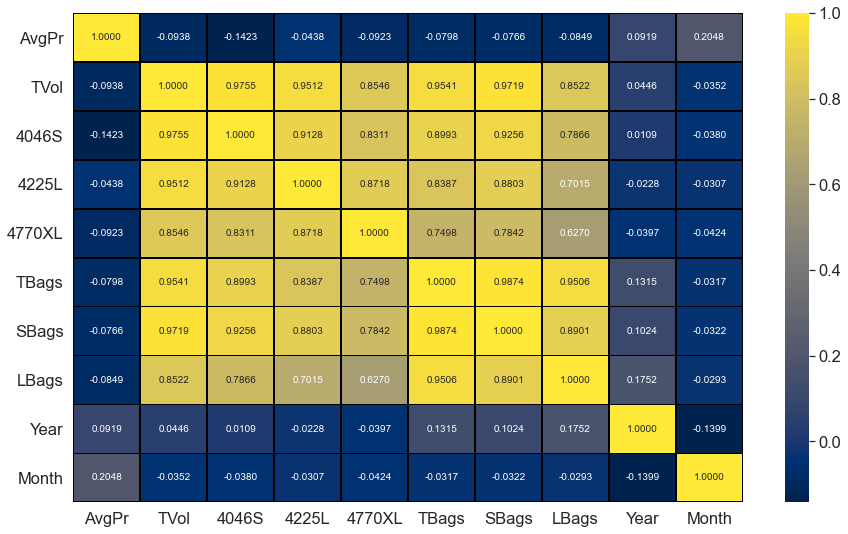

In [355]:
# Heatmap showing the correlation of all the columns.
#I got rid of XL and Organic -Jovany 11/22/2020

f,ax = plt.subplots(figsize = (15,9))
sns.heatmap(avo2.corr(), annot=True,cmap = 'cividis', linewidths=0.7,linecolor="black", fmt= '.4f',ax=ax)


# Let us see how well Small Bags and Large Bags sold compared to one another by Year and Location

In [356]:
avo_pivot= pd.pivot_table(data=avo20, index='Location', values=['SBags', 'LBags'], columns= 'Year')
avo_pivot.head()

LBags                                             \
Year                          2015          2016          2017           2018   
Location                                                                        
Albany                  346.097500    445.516731   5525.929245    4671.454490   
Atlanta               20621.039808  82290.140577  69807.628868  107053.828367   
Baltimore/Washington   4517.016346   3386.395385   7334.028679   12231.736122   
Boise                   354.146538    949.060000   4686.755094   18115.750612   
Boston                 1451.942692    576.943077  16797.700377   22300.155102   

                                             SBags                 \
Year                           2019           2015           2016   
Location                                                            
Albany                  5711.570192   12389.069231   13735.217885   
Atlanta                79147.914808   35822.103846  103880.559615   
Baltimore/Washington  108575.997885  174485.440962  185889.527692   
Boise                  24528.243654    9084.977308   41443.625962   
Boston                 39781.165769  106131.438269  121091.997692   

                                                                   
Year                           2017           2018           2019  
Location                                                           
Albany                  7321.221698   14076.201633    8581.601346  
Atlanta               136947.329245  223856.682245  300010.847885  
Baltimore/Washington  188129.262830  256425.867551  225783.266538  
Boise                  32639.791321   21652.158163   24361.851923  
Boston                 94175.470943  105869.847551  120709.386923

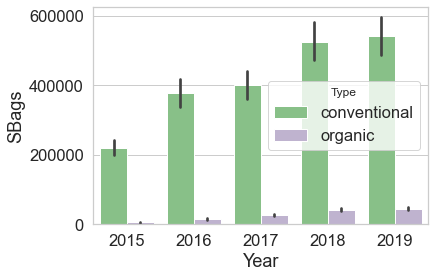

In [357]:
#ignore
#I was just testing to see if avo21 worked properly - Jovany 11/22/2020
sns.barplot(x='Year', y='SBags', data=avo21, hue='Type', palette='Accent')

#cov, corr_matrix
#np.cov(avo21['LBags'])

<h3><p>Let's checkout on how Small Bags and Large Bags did over the years. I think there will be a rise up until 2017 and then a small drop off right after.

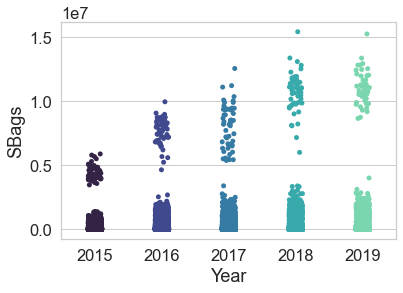

In [358]:
#Using the stripplot to see how well Small Bags sold throughout the years. Organic is not included in either stripplot

sns.stripplot(x='Year', y='SBags', data=avo21, palette='mako')

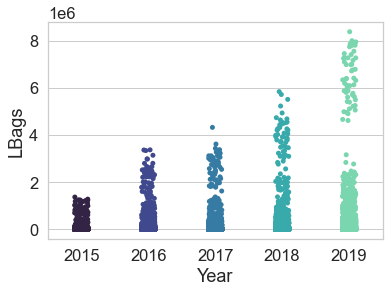

In [359]:
sns.stripplot(x='Year', y='LBags', data=avo21, palette='mako')

<h3><p>Well it looks like I was wrong in my assumption. I thought that perhaps there would be a decline due to just a general loss of interest or a rise in price for Avocados over time. It looks like Avocados steadily rose and sold more over time. Even more interesting Large Bags sold more than Small bags in 2019 whereas Small Bags sold a lot better between 2016-2018.

In [360]:
print('Let us see what the variance for Small Bags:',np.var(avo21['SBags']))
print('Meanwhile, the variance for Large Bags:', np.var(avo21['LBags']))

Let us see what the variance for Small Bags: 792234305630.5021
Meanwhile, the variance for Large Bags: 160254578736.94504


In [361]:
print('Now that we have seen the variances let us see the covariances for Small Bags:',np.cov(avo20['SBags']))
print('Now let us see the covariances for Large Bags:',np.cov(avo20['LBags']))

Now that we have seen the variances let us see the covariances for Small Bags: 1502003924288.1196
Now let us see the covariances for Large Bags: 308303679814.7801


<h3>Let us compare the mean for Small and Large Bags

In [362]:
#I added the PLU codes for Avocados as well just to compare 

print(avo20[['SBags','LBags','4046S','4225L']].mean())

SBags    412175.702585
LBags    159118.379311
4046S    582518.852705
4225L    562986.915613
dtype: float64


<h3>Now let's view the median for Small and Large Bags

In [363]:
print(avo20[['SBags','LBags','4046S','4225L']].median())

SBags     91651.665
LBags     25947.075
4046S    106381.330
4225L    131369.425
dtype: float64


In [384]:
#Not sure where to put this section but for now I left it here Ill remove/move it later once we get a better flow for how we want our project to look -Jovany 11/22/2020

# Compute the variance: variance
variance = np.var(avo20['4225L'])


# Print the square root of the variance
print('Lets see the Square Root of the Variance for Large Avocados:',np.sqrt(variance))


# Print the standard deviation
print('Here is the Standard Deviation for Large Bags:',np.std(avo20['LBags']))

Lets see the Square Root of the Variance for Large Avocados 1626446.102312469
Here is the Standard Deviation for Large Bags: 555231.0785959265


In [390]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat= np.corrcoef(x, y)

    

    # Return entry [0,1]
    return corr_mat[0,1]

    


# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(avo20['Year'], avo20['LBags'])


# Print the result
print(r)

0.16117087189009152


## We decided to primarily use the Regions for comparision because the data from regions match closest with the Total U.S. according to 
https://medium.com/@msajida333/hass-avocado-data-analysis-for-the-years-2015-2020-part-1-e53b81d3b4f2

## NEED TO DROP CITIES AND STATES TO GET REGIONS ONLY TO RUN THIS CODE

In [5]:
#I didnt delete this because I am not sure if you still want to use this for something else - Jovany 11/22/2020
#DONT RUN!! Need to define avo_region first!! -Jovany -11/23/2020
avo_region.dropna(axis=0, subset=['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 
                  'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFt. Worth', 'Denver', 
                  'Detroit', 'Grand Rapids', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 
                  'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville', 
                  'MiamiFt. Lauderdale', 'Nashville', 'New OrleansMobile', 'New York', 'Orlando', 
                  'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 
                  'RichmondNorfolk', 'Roanoke', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 
                  'South Carolina', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa'])



<h3><p>Let's make a set that contains various Cities only so we can test our theory on whether or not [insert city here] did better than [insert city here]

In [4]:
Cities= ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 
                  'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFt. Worth', 'Denver', 
                  'Detroit', 'Grand Rapids', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 
                  'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville', 
                  'MiamiFt. Lauderdale', 'Nashville', 'New OrleansMobile', 'New York', 'Orlando', 
                  'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Portland', 'RaleighGreensboro', 
                  'RichmondNorfolk', 'Roanoke', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 
                  'Spokane', 'St. Louis', 'Syracuse', 'Tampa']
Cities

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFt. Worth',
 'Denver',
 'Detroit',
 'Grand Rapids',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'Las Vegas',
 'Los Angeles',
 'Louisville',
 'MiamiFt. Lauderdale',
 'Nashville',
 'New OrleansMobile',
 'New York',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'San Diego',
 'San Francisco',
 'Seattle',
 'Spokane',
 'St. Louis',
 'Syracuse',
 'Tampa']

In [394]:
Region = {'California', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'South Carolina', 'South Central', 'Southeast', 'West'}
Region

{'California',
 'Great Lakes',
 'Midsouth',
 'Northeast',
 'Plains',
 'South Central',
 'Southeast',
 'West'}

In [401]:
#I updated it to what region was changed to -Jovany 11/22/2020
avo1[avo1['Location']=='TotalUS']

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Type,Year,Location,Month,Date_Q


In [32]:
#An interactive iPlot to see how well Large Avocados sold in its different locations
avo20.iplot(kind='bar', x='Location', y='4225L', color='#1a75ff')

In [387]:
# Correlation matrix for Conventional avocados.
avo1.corr()

,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Year,Month,Date_Q
AvgPr,1.000000,-0.184255,-0.203079,-0.161584,-0.171439,-0.165742,-0.167315,-0.153199,-0.105359,-0.011460,0.147199,0.153490
TVol,-0.184255,1.000000,0.976503,0.953720,0.861139,0.955636,0.972365,0.857310,0.735133,0.033126,-0.024865,-0.025135
4046S,-0.203079,0.976503,1.000000,0.917269,0.839122,0.902623,0.927221,0.794043,0.667539,0.007287,-0.026504,-0.027237
4225L,-0.161584,0.953720,0.917269,1.000000,0.877696,0.845508,0.884774,0.713055,0.597591,-0.016295,-0.021687,-0.021068
4770XL,-0.171439,0.861139,0.839122,0.877696,1.000000,0.759560,0.792079,0.640577,0.605428,-0.027676,-0.029445,-0.029247
TBags,-0.165742,0.955636,0.902623,0.845508,0.759560,1.000000,0.987919,0.951869,0.835809,0.098003,-0.022832,-0.023402
SBags,-0.167315,0.972365,0.927221,0.884774,0.792079,0.987919,1.000000,0.893344,0.803242,0.079293,-0.022776,-0.023142
LBags,-0.153199,0.857310,0.794043,0.713055,0.640577,0.951869,0.893344,1.000000,0.816688,0.125919,-0.022062,-0.022971
XLBags,-0.105359,0.735133,0.667539,0.597591,0.605428,0.835809,0.803242,0.816688,1.000000,0.118915,-0.009561,-0.010498
Year,-0.011460,0.033126,0.007287,-0.016295,-0.027676,0.098003,0.079293,0.125919,0.118915,1.000000,-0.139853,-0.141392


### The years have been changed into quarters below for future comparisons.

In [365]:
# Changed Year into 4 Quarters. This will make it easier to compare Average Price and Total Volume later.

avo1['Date_Q'] = avo1['Date'].apply(lambda x: x.quarter)
avo1['Date_Q'].value_counts()

#I have no idea why but this section stops working from time to time -Jovany 11/22/2020

1    8424
2    7774
3    7128
4    6695
Name: Date_Q, dtype: int64

<h3><p>Let us test our previous code to see if it will properly show up in our dataset

In [372]:
#Just want to see if the first three have Quarters or not
avo1.head(3)

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Type,Year,Location,Month,Date_Q
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,1


<h3><p>GREAT!! Now that we have added Quarters to our Dataset let us see how much has Average Price has changed over time.

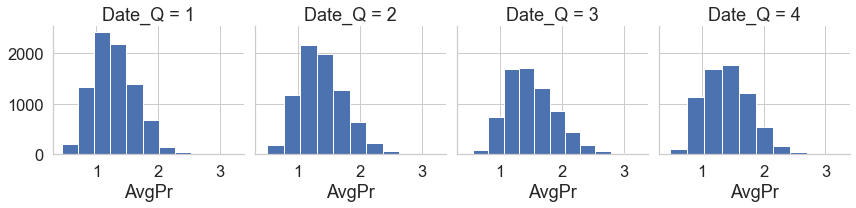

In [379]:
#Should we use a different plot map that includes Years as well to better showcase how much has changed? -Jovany 11/22/2020

quart=sns.FacetGrid(data=avo1,col='Date_Q')
quart.map(plt.hist,'AvgPr')

## This code below needs to be updated after Organic and XLBags have been removed.

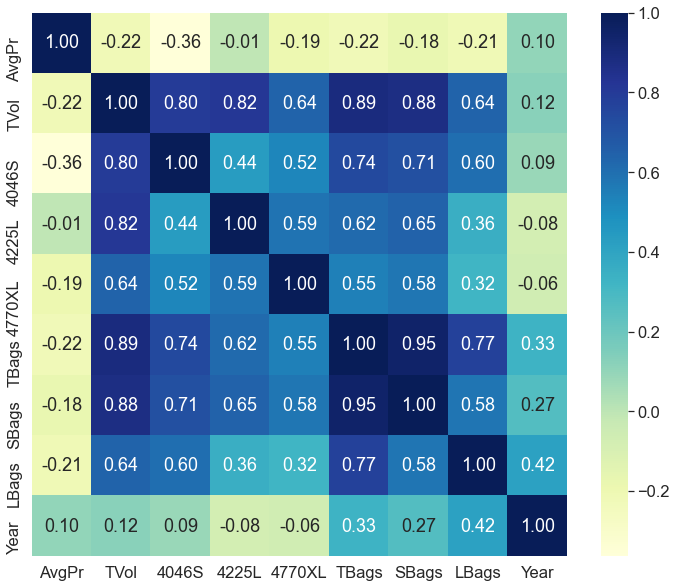

In [322]:
#I took out Organic and XL - Jovany 11/22/2020

cols = ['AvgPr','TVol','4046S','4225L','4770XL','TBags','SBags','LBags','Year','Type']
sns.set(font_scale = 1.5)
corr = avo2[cols].corr('spearman') 
plt.figure(figsize = ( 12 , 10 )) 
sns.heatmap(corr,annot=True,fmt='.2f',cmap="YlGnBu");

In [ ]:
# mean, median, mean, var, std, corr, cov, corr_matrix, percentiles

# Possible Anova Hypothesis?


<h4><p>Let's test the relationship between: Average Price vs Large Bags</h4></p>

In [214]:
pearson_coef, p_value = stats.pearsonr(avo20['AvgPr'], avo20['LBags'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.08498513806499854  with a P-value of P = 9.336276122280006e-24


<h4>Conclusion:</h4>

<p>It appears that the P-value relationship between Large Bags and Average Price is statistically significant because the corelation is < 0.001.  

In [216]:
#I dont think I got the conclusions right
pearson_coef, p_value = stats.pearsonr(avo20['SBags'], avo20['AvgPr'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.07839050069157671  with a P-value of P = 1.9295593043278432e-20


<h3>Conclusion:</h3>

<p>It appears that the P-value relationship between Small Bags and Average Price is statistically significant because the corelation is .  

In [215]:
pearson_coef, p_value = stats.pearsonr(avo20['SBags'], avo20['Year'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.09089791325515532  with a P-value of P = 5.904882472077167e-27


<h3><p>Conclusion:</h3></p>



In [224]:
pearson_coef, p_value = stats.pearsonr(avo20['SBags'], avo20['LBags'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8861135718792293  with a P-value of P = 0.0


<h3>Conclusion:</h3>

<p>It appears that the P-value relationship between Small Bags and Average Price seems to be weak because the corelation is < 0.001.  

In [227]:
pearson_coef, p_value = stats.pearsonr(avo20['TVol'], avo20['Year'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.035306221540229304  with a P-value of P = 3.069386636955602e-05
